<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/chest_xray

/content/drive/My Drive/chest_xray


In [ ]:
ls

chest_xray/  logs/  __MACOSX/  test/  train/  val/


In [ ]:
# TULIS CODE ANDA DISINI
base_dir = "/content/drive/My Drive/chest_xray"
data_dir = "/content/drive/My Drive/chest_xray"

In [ ]:
import os

def count(path):
  x = 0
  for root, dirs, files in os.walk(path):
    for f in files:
      x = x + 1
  return x

training = "/content/drive/My Drive/chest_xray/train"
#validation = "/content/drive/My Drive/chest_xray/val"
testing = "/content/drive/My Drive/chest_xray/val"
#testing = "/content/drive/My Drive/chest_xray/test"

print("Total Data Training : ", count(training))
#print("Total Data Validation : ", count(validation))
print("Total Data Training : ", count(testing))

Total Data Training :  5216
Total Data Training :  16


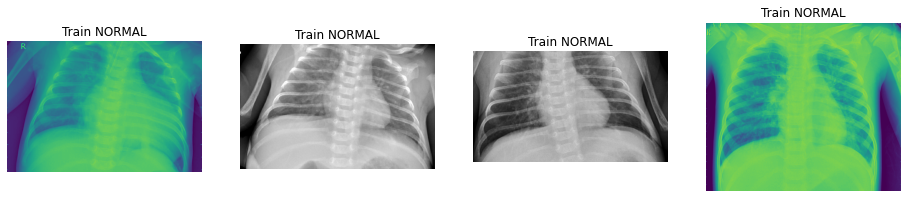

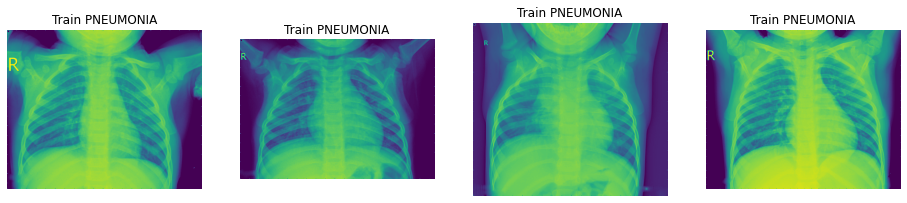

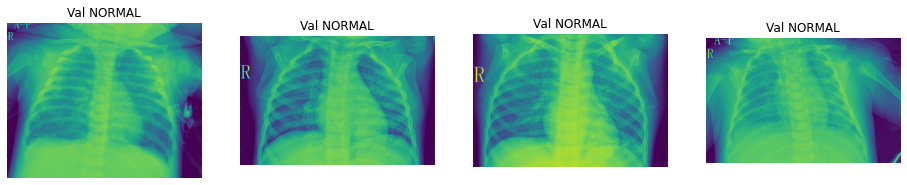

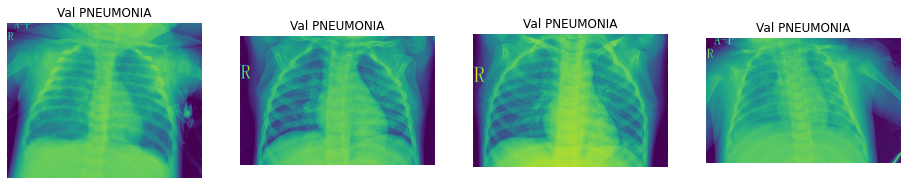

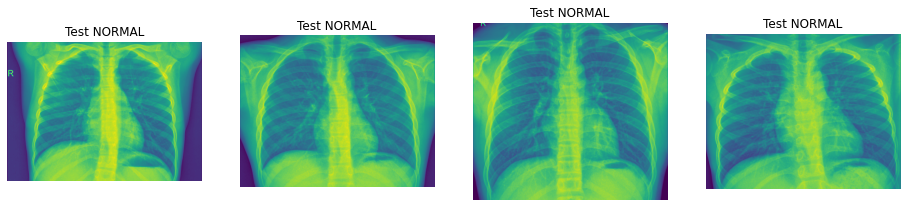

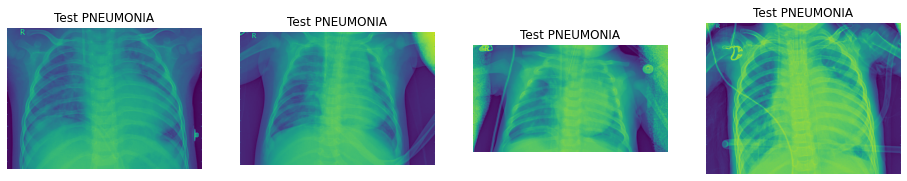

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

a = os.path.join("/content/drive/My Drive/chest_xray/train/NORMAL")
b = os.path.join("/content/drive/My Drive/chest_xray/train/PNEUMONIA")

c = os.path.join("/content/drive/My Drive/chest_xray/val/NORMAL")
d = os.path.join("/content/drive/My Drive/chest_xray/val/PNEUMONIA")

e = os.path.join("/content/drive/My Drive/chest_xray/test/NORMAL")
f = os.path.join("/content/drive/My Drive/chest_xray/test/PNEUMONIA")

g = os.listdir(a)
h = os.listdir(b)
i = os.listdir(c)
j = os.listdir(d)
k = os.listdir(e)
l = os.listdir(f)


fname1 = [os.path.join(a,fname)
        for fname in g[:4]]

fname2 = [os.path.join(b,fname)
        for fname in h[:4]]

fname3 = [os.path.join(c,fname)
        for fname in i[:4]]

fname4 = [os.path.join(d,fname)
        for fname in j[:4]]

fname5 = [os.path.join(e,fname)
        for fname in k[:4]]

fname6 = [os.path.join(f,fname)
        for fname in l[:4]]


ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Train NORMAL')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Train PNEUMONIA')
    plt.imshow(img)
plt.show()


ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Val NORMAL')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Val PNEUMONIA')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname5):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Test NORMAL')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname6):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Test PNEUMONIA')
    plt.imshow(img)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

augmen_gen = ImageDataGenerator(rescale=1. / 255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    training,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (128,128),
    batch_size=32,
    color_mode ='rgb'
)

aug=ImageDataGenerator(rescale=1. / 255)
val_gen = aug.flow_from_directory(
    testing,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (128,128),
    batch_size=32,
    color_mode ='rgb'
)




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, concatenate, GlobalMaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.vgg19 import VGG19

input = (128, 128, 3)
input_model = Input(shape=input)

vgg16 = VGG16(include_top=False, input_shape = input)(input_model)
vgg19 = VGG19(include_top=False, input_shape = input)(input_model)
resnet = ResNet50V2(include_top=False, input_shape = input)(input_model)

def combinemodel(m1, m2):
  model = concatenate([m1, m2])
  model = GlobalMaxPooling2D()(model)
  model = Flatten(name="flatten")(model)
  model = Dense(256, activation="relu")(model)
  model = Dropout(0.2)(model)
  model = Dense(64, activation="relu")(model)
  model = Dropout(0.2)(model)
  model = Dense(8, activation="softmax")(model)
  return model

vgg16.trainable = False
vgg19.trainable = False
resnet.trainable = False

In [ ]:
# Hasil pengerjaan point 2.1 (model 1)

sc1 = combinemodel(vgg16, resnet)
# model1 = Model(inputs = input_model, outputs = sc1)
model1 = Model(inputs = input_model, outputs = ())
model1.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Hasil pengerjaan point 2.1 (model 2)

sc2 = combinemodel(vgg19, resnet)
model2 = Model(inputs = input_model, outputs = ())
model2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

tensorboard=tf.keras.callbacks.TensorBoard(log_dir='./logs/aug')

%load_ext tensorboard

!rm -rf ./logs/aug


def callback(path):
  checkpoint_callback = ModelCheckpoint(path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
  reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000001, verbose=1)
  callbacks_list = [checkpoint_callback, reduce_callback]
  return callbacks_list


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Hasil pengerjaan point 2.2 (model 1)
from tensorflow.keras.optimizers import Adam

best_model_path = 'best_model.h5'
cback1=callback(best_model_path)

model1.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='accuracy')

Comp1 = model1.fit(train_gen, epochs=10,validation_data=val_gen, verbose=1, callbacks=[tensorboard,cback1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
163/163 [==============================] - 97s 594ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 96s 587ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 95s 582ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 112s 690ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 96s 586ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 95s 583ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - 95s 584ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 8/10
163/163 [==============================] - 95s 583ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 9

In [ ]:
!ls

chest_xray  logs  __MACOSX  test  train  val


In [ ]:
# Hasil pengerjaan point 2.2 (model 2)
from tensorflow.keras.optimizers import Adam

best_model_path2 = 'best_model2.h5'
cback2=callback(best_model_path2)

model2.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics='accuracy')

Comp2 = model2.fit(train_gen, epochs=10,validation_data=val_gen, verbose=1, callbacks=[tensorboard,cback2])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
163/163 [==============================] - 107s 653ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 2/10
163/163 [==============================] - 96s 588ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 3/10
163/163 [==============================] - 95s 585ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 4/10
163/163 [==============================] - 95s 582ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 5/10
163/163 [==============================] - 100s 613ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 6/10
163/163 [==============================] - 97s 592ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 7/10
163/163 [==============================] - 96s 588ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 8/10
163/163 [==============================] - 96s 588ms/step - loss: 0.0000e+00 - val_loss: 0.0000e+00 - lr: 0.0010
Epoch 

In [ ]:
# Hasil pengerjaan point 3.1 (model 1)

from tensorflow.keras.models import load_model

model_1 = load_model("best_model.h5")
model_2 = load_model("best_model2.h5")

OSError: ignored

In [ ]:
# Hasil pengerjaan point 3.2

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

ypred1 = model_1.predict(val_gen)
predictions = np.argmax(ypred1, axis = 1)
# labels = (ypred1 > 0.5).astype(np.int)
labels = ['Normal', 'Pneumonia']
print("Classification Report Model Pertama:")
print(classification_report(val_gen.classes,predictions,target_names=labels))

ypred2 = model_2.predict(val_gen)
predictions2 = np.argmax(ypred2, axis = 1)
# labels = (ypred1 > 0.5).astype(np.int)
print("Classification Report Model Kedua:")
print(classification_report(val_gen.classes,predictions2,target_names=labels))

NameError: ignored